In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 100

## Members info

In [3]:
members = pd.read_csv('/Users/skulkarni11/Documents/WIL/sem2/Machine Learning/project/data/Music subscriptions/members_v3.csv')

In [4]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769473 entries, 0 to 6769472
Data columns (total 6 columns):
msno                      object
city                      int64
bd                        int64
gender                    object
registered_via            int64
registration_init_time    int64
dtypes: int64(4), object(2)
memory usage: 309.9+ MB


In [5]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


In [6]:
members.count()

msno                      6769473
city                      6769473
bd                        6769473
gender                    2339968
registered_via            6769473
registration_init_time    6769473
dtype: int64

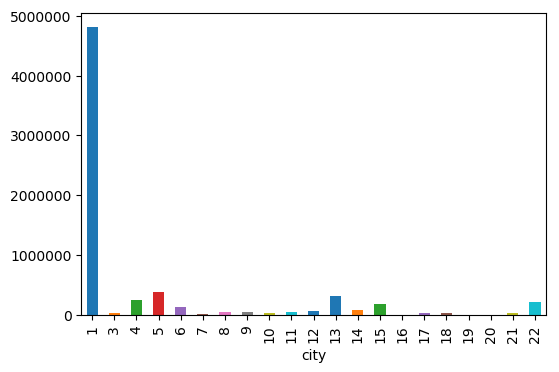

In [7]:
members.groupby("city")["msno"].count().plot.bar()

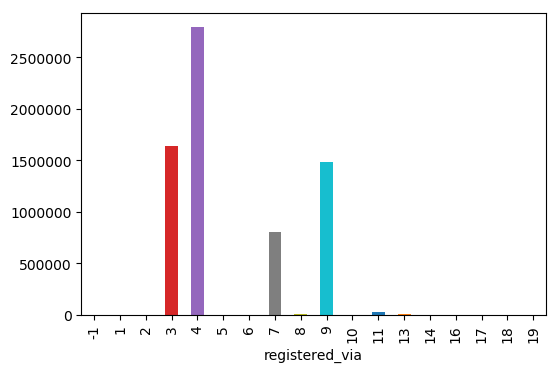

In [8]:
members.groupby("registered_via")["msno"].count().plot.bar()

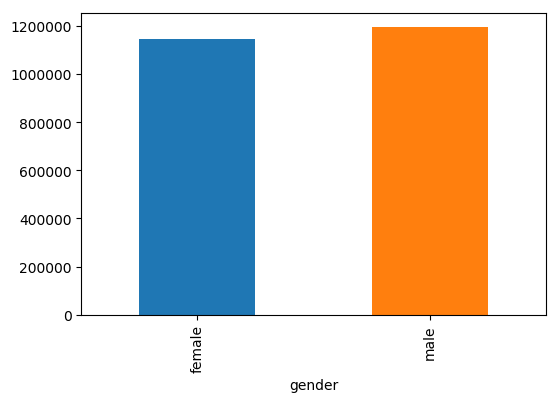

In [9]:
members.groupby("gender")["msno"].count().plot.bar()

In [10]:
members.isna().sum()

msno                            0
city                            0
bd                              0
gender                    4429505
registered_via                  0
registration_init_time          0
dtype: int64

## Transaction info

In [11]:
transactions = pd.read_csv('/Users/skulkarni11/Documents/WIL/sem2/Machine Learning/project/data/Music subscriptions/transactions_v2.csv')

In [12]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1431009 entries, 0 to 1431008
Data columns (total 9 columns):
msno                      1431009 non-null object
payment_method_id         1431009 non-null int64
payment_plan_days         1431009 non-null int64
plan_list_price           1431009 non-null int64
actual_amount_paid        1431009 non-null int64
is_auto_renew             1431009 non-null int64
transaction_date          1431009 non-null int64
membership_expire_date    1431009 non-null int64
is_cancel                 1431009 non-null int64
dtypes: int64(8), object(1)
memory usage: 98.3+ MB


In [13]:
transactions.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,20170131,20170504,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,20150809,20190412,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,20170303,20170422,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,20170329,20170331,1
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,20170323,20170423,0


In [14]:
transactions[(transactions["is_auto_renew"] == 0) & (transactions["is_cancel"] == 1)].count()

msno                      0
payment_method_id         0
payment_plan_days         0
plan_list_price           0
actual_amount_paid        0
is_auto_renew             0
transaction_date          0
membership_expire_date    0
is_cancel                 0
dtype: int64

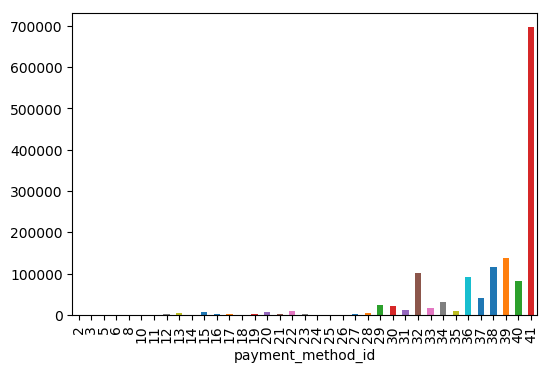

In [15]:
transactions.groupby("payment_method_id")["msno"].count().plot.bar()

In [16]:
transactions[transactions["payment_plan_days"]>=30].pivot_table(index="payment_plan_days", columns="payment_method_id", values='msno', aggfunc='count')

payment_method_id,2,3,6,8,10,11,12,13,14,15,...,31,32,33,34,36,37,38,39,40,41
payment_plan_days,,,,,,,,,,,,,,,,,,,,,
30,NaN,NaN,NaN,NaN,40.0,79.0,NaN,NaN,672.0,NaN,...,11440.0,NaN,16593.0,31071.0,90844.0,40411.0,53938.0,137120.0,82746.0,694527.0
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,1.0,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,NaN,NaN,NaN,NaN,NaN,NaN,72.0,NaN,NaN,844.0,...,NaN,626.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN,NaN,89.0,NaN,NaN,1814.0,...,NaN,6930.0,NaN,NaN,NaN,NaN,10099.0,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN


In [17]:
transactions[transactions["payment_plan_days"]>=30].pivot_table(index="payment_plan_days", columns="is_auto_renew", values='msno', aggfunc='count')

is_auto_renew,0,1
payment_plan_days,,
30,96397.0,1121601.0
31,NaN,4.0
35,29.0,NaN
45,41.0,NaN
60,3134.0,NaN
70,49.0,NaN
80,43.0,NaN
90,19130.0,NaN
100,4098.0,NaN


In [18]:
transactions[transactions["payment_plan_days"]>=30].pivot_table(index="payment_plan_days", columns="is_cancel", values='msno', aggfunc='count')

is_cancel,0,1
payment_plan_days,,
30,1182910.0,35088.0
31,3.0,1.0
35,29.0,NaN
45,41.0,NaN
60,3134.0,NaN
70,49.0,NaN
80,43.0,NaN
90,19130.0,NaN
100,4098.0,NaN


In [19]:
transactions.groupby('msno')['payment_method_id'].count().nlargest(10)

msno
72gJqt1O31E/WoxAEYFn9LHNI6mAZFGera5Q6gvsFkA=    208
5ty4nZkq54z93wQtBN7RHVYj8rNghBDCVBH+3xmxf0I=    172
OGKDrZQDB3yewZhoSd5qqvmG5A1GcNTYMexO95NlH+g=    148
WHsCtkOVsauvqBL0ULuG38887y7aU8GXdCmJMjw6hjQ=    145
SNlFRAsmUqnXKPofSXA8WYUc5DtmLcUMy4pXSJ3Ohz0=    131
vf6eQrnFfiS9o1kB/gRUJ4iTUixS9tHNKizqQ/1vLDI=    117
hQirtFbRr8t5T+/aVbrXM2tRNvoOIzChx5qzm1v/PE0=    104
IO+048XfFoL7X++ftIyb/zFKwNUUAkKaZLWrvg48TXA=     89
gzTushiuaWZwJShNepFWD+O9a7C76pAfW7Vc07jHXw8=     89
cmlCHjCLeo0TQK1S/37OqQK1AvwJWkD2h5HBd9lATgw=     78
Name: payment_method_id, dtype: int64

## Churn info

In [20]:
churn = pd.read_csv('/Users/skulkarni11/Documents/WIL/sem2/Machine Learning/project/data/Music subscriptions/train_v2.csv')

In [21]:
len(churn)

970960

In [22]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970960 entries, 0 to 970959
Data columns (total 2 columns):
msno        970960 non-null object
is_churn    970960 non-null int64
dtypes: int64(1), object(1)
memory usage: 14.8+ MB


In [23]:
churn.head()

,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1


In [24]:
members[members['msno'] == 'ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=']

,msno,city,bd,gender,registered_via,registration_init_time
2930262,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,5,28,male,3,20131223


In [25]:
members1 = pd.merge(members, churn, on='msno', how='outer')

In [26]:
## Make sure the churn count is correct, len(churn) == len(temp["is_churn"])
members1.isna().sum()

msno                            0
city                       109993
bd                         109993
gender                    4539498
registered_via             109993
registration_init_time     109993
is_churn                  5908506
dtype: int64

In [27]:
members1['is_churn'].fillna(0, inplace=True)

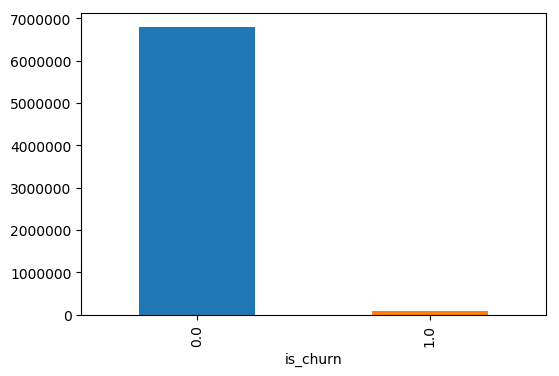

In [28]:
members1.groupby('is_churn')['msno'].count().plot.bar()

In [31]:
members1.pivot_table(index='gender', columns='is_churn', values='msno', aggfunc='count')

is_churn,0.0,1.0
gender,,
female,1120673,23940
male,1168959,26396


In [3]:
user_log = pd.read_csv('/Users/skulkarni11/Documents/WIL/sem2/Machine Learning/project/data/Final/user_logs.csv', dtype={'num_25': np.int8, 'num_50': np.int8, 'num_75': np.int8, 'num_985': np.int8, 'num_100': np.int8, 'num_unq': np.int16})

In [4]:
user_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392106543 entries, 0 to 392106542
Data columns (total 9 columns):
msno          object
date          int64
num_25        int8
num_50        int8
num_75        int8
num_985       int8
num_100       int8
num_unq       int16
total_secs    float64
dtypes: float64(1), int16(1), int64(1), int8(5), object(1)
memory usage: 11.3+ GB
